In [1]:
import pandas as pd

df = pd.read_excel("Indices weed-crop.xlsx", sheet_name="summer-winter")
df=df.drop(["date","plant","leaf","code"],axis=1)


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  1146 non-null   object 
 1   RARSa    1146 non-null   float64
 2   RARSb    1146 non-null   float64
 3   NDVI705  1146 non-null   float64
 4   PSSRa    1146 non-null   float64
 5   PSSRb    1146 non-null   float64
 6   PSNDa    1146 non-null   float64
 7   PSNDb    1146 non-null   float64
 8   YI       1146 non-null   float64
 9   mSR      1146 non-null   float64
 10  mNDI     1146 non-null   float64
 11  DD       1146 non-null   float64
 12  RES      1146 non-null   float64
 13  RARSc    1146 non-null   float64
 14  SIPI     1146 non-null   float64
 15  PSSRc    1146 non-null   float64
 16  PRI      1146 non-null   float64
 17  CARI     1146 non-null   float64
 18  MSI      1146 non-null   float64
 19  WI       1146 non-null   float64
 20  TM5/TM7  1146 non-null   float64
 21  NDVIa    1146 

,RARSa,RARSb,NDVI705,PSSRa,PSSRb,PSNDa,PSNDb,YI,mSR,mNDI,...,TBRIa,TBRIb,NDWIa,NDWIb,NDWIc,WABIa,WABIb,WABIc,NDlma,NDMI
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,...,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,0.519864,0.043861,0.416413,6.751393,5.960198,0.719571,0.688698,-0.007408,1.308598,0.609794,...,0.993165,0.959200,0.501262,0.207762,0.491615,0.017777,0.023488,-0.044849,0.098048,-0.001618
std,0.120340,0.015007,0.088902,2.432743,2.128410,0.077474,0.084573,0.003715,0.381503,0.139159,...,0.019101,0.013173,0.080983,0.046810,0.083871,0.130894,0.128779,0.130719,0.027487,0.004573
min,0.252713,0.014465,0.167501,2.379702,2.342322,0.408232,0.401614,-0.020068,0.349013,0.239756,...,0.923857,0.893970,0.289802,0.106581,0.231953,-0.524922,-0.509767,-0.552210,0.002883,-0.018870
25%,0.427298,0.032562,0.349211,5.191537,4.561200,0.676978,0.640365,-0.009650,1.061906,0.507583,...,0.980313,0.954246,0.448305,0.178148,0.438614,-0.066273,-0.060481,-0.127457,0.080672,-0.004281
50%,0.522573,0.042078,0.413918,6.094983,5.505523,0.718111,0.692569,-0.007591,1.279833,0.590049,...,0.990489,0.961262,0.495773,0.203003,0.488522,0.038463,0.041210,-0.029252,0.095220,-0.001610
75%,0.618616,0.053245,0.489764,7.571383,6.699014,0.766665,0.740226,-0.005763,1.526919,0.718444,...,1.004241,0.967272,0.547191,0.228001,0.537189,0.109447,0.114722,0.046070,0.111392,0.001084
max,0.818370,0.167071,0.638737,15.674217,15.186808,0.880054,0.876443,0.011261,2.625792,1.079920,...,1.064606,0.995806,0.792116,0.427457,0.803921,0.420096,0.414519,0.357468,0.233659,0.012492


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features: Drop the target column 'species' to create feature set X
y = df["species"]               # Target: Assign the target variable 'species' to y

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split data into training and testing sets with stratification

# Define the model
rf = RandomForestClassifier(random_state=42)  # Create a Random Forest classifier without specifying parameters

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)  # Set up GridSearchCV with cross-validation

# Fit GridSearchCV
grid_search.fit(X_train, y_train)  # Fit the model to the training data

# Get the best parameters and best score
best_params = grid_search.best_params_  # Retrieve the best hyperparameters
best_score = grid_search.best_score_  # Retrieve the best cross-validated score

print("Best Parameters:", best_params)  # Print the best hyperparameters
print("Best Cross-Validated Score:", best_score)  # Print the best score

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_  # Get the best estimator from the grid search
y_pred = best_rf.predict(X_test)  # Make predictions on the test set using the best estimator

# Evaluate the model
accuracy = best_rf.score(X_test, y_test)  # Calculate the accuracy of the best model on the test set
print("Accuracy:", accuracy)  # Print the accuracy

# The rest of your code remains unchanged

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_rf.predict(X_test)  # Make predictions on the test set
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create a heatmap for the confusion matrix
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = best_rf.predict(X_test)  # Make predictions on the test set again
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix again
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Calculate percentage values for the confusion matrix

class_labels = np.unique(y_test)  # Get unique class labels from the test set
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)  # Create a DataFrame for the confusion matrix percentages
cm_df  # Display the confusion matrix DataFrame

importances = best_rf.feature_importances_  # Get feature importances from the best model
feature_names = X.columns  # Get the feature names from the DataFrame
feature_importance_df = pd.DataFrame({  # Create a DataFrame for feature importances
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)  # Sort the DataFrame by importance

plt.figure(figsize=(10, 6))  # Set the figure size for the feature importance plot
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')  # Create a horizontal bar plot for feature importances
plt.xlabel('Variable Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.title('Feature Importances from Random Forest')  # Title of the plot
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()  # Display the plot

cm_df  # Display the confusion matrix DataFrame

classification_report(y_test, y_pred)  # Generate and display the classification report

NameError: name 'train_test_split' is not defined

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_sampl

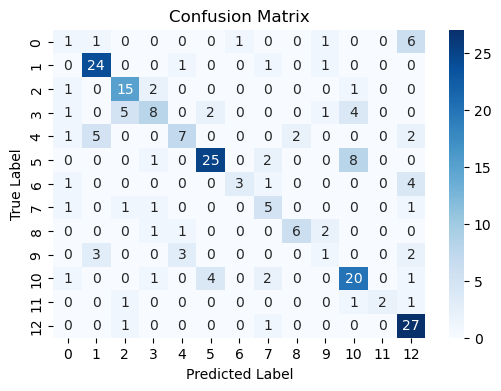

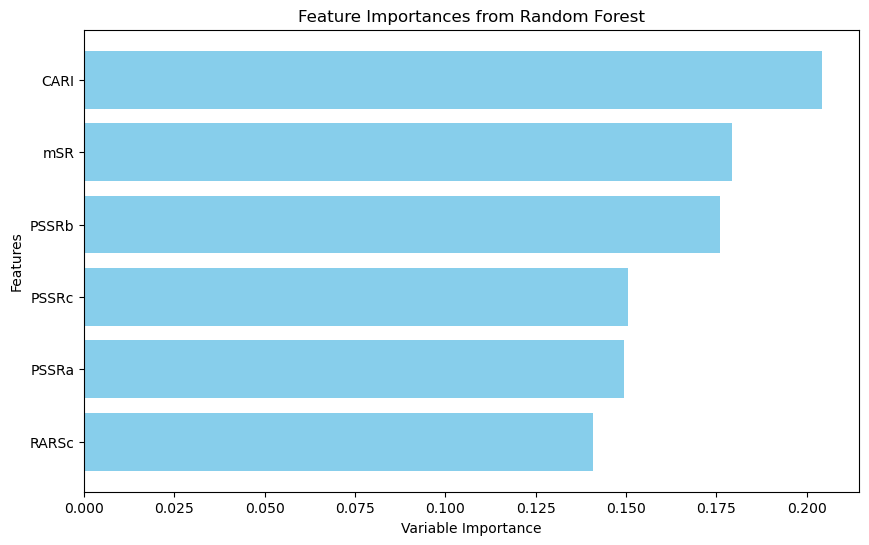

'              precision    recall  f1-score   support\n\n      Barley       0.14      0.10      0.12        10\n       CHEAL       0.73      0.89      0.80        27\n       CYPES       0.65      0.79      0.71        19\n       ECHCG       0.57      0.38      0.46        21\n       GASCI       0.58      0.41      0.48        17\n       Maize       0.81      0.69      0.75        36\n  OAT (CROP)       0.75      0.33      0.46         9\n  OAT (WEED)       0.42      0.56      0.48         9\n       PAPRO       0.75      0.60      0.67        10\n       POLAV       0.17      0.11      0.13         9\n       SORHA       0.59      0.69      0.63        29\n       VERHE       1.00      0.40      0.57         5\n       Wheat       0.61      0.93      0.74        29\n\n    accuracy                           0.63       230\n   macro avg       0.60      0.53      0.54       230\nweighted avg       0.63      0.63      0.61       230\n'

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
#Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa","PSSRb","mSR","RARSc","PSSRc","CARI"]]  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the random forest
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)  # Set up GridSearchCV with cross-validation

# Fit GridSearchCV
grid_search.fit(X_train, y_train)  # Fit the model to the training data

# Get the best parameters and best score
best_params = grid_search.best_params_  # Retrieve the best hyperparameters
best_score = grid_search.best_score_  # Retrieve the best cross-validated score

print("Best Parameters:", best_params)  # Print the best hyperparameters
print("Best Cross-Validated Score:", best_score)  # Print the best score

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_  # Get the best estimator from the grid search
y_pred = best_rf.predict(X_test)  # Make predictions on the test set using the best estimator

# Evaluate the model
accuracy = best_rf.score(X_test, y_test)  # Calculate the accuracy of the best model on the test set
print("Accuracy:", accuracy)  # Print the accuracy

# The rest of your code remains unchanged

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_rf.predict(X_test)  # Make predictions on the test set
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create a heatmap for the confusion matrix
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = best_rf.predict(X_test)  # Make predictions on the test set again
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix again
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Calculate percentage values for the confusion matrix

class_labels = np.unique(y_test)  # Get unique class labels from the test set
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)  # Create a DataFrame for the confusion matrix percentages
cm_df  # Display the confusion matrix DataFrame

importances = best_rf.feature_importances_  # Get feature importances from the best model
feature_names = X.columns  # Get the feature names from the DataFrame
feature_importance_df = pd.DataFrame({  # Create a DataFrame for feature importances
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)  # Sort the DataFrame by importance

plt.figure(figsize=(10, 6))  # Set the figure size for the feature importance plot
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')  # Create a horizontal bar plot for feature importances
plt.xlabel('Variable Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.title('Feature Importances from Random Forest')  # Title of the plot
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()  # Display the plot

cm_df  # Display the confusion matrix DataFrame

classification_report(y_test, y_pred)  # Generate and display the classification report